# 공공데이터를 활용한 서울 공차(카페) 데이터 시각화

- 데이터 개요
1. 2023년 06월 기준
2. 상권업종중분류명이 "무알코올"로 등록된 카페
3. 데이터 출처: 공공데이터포털(data.go.kr): 소상공인시장진흥공단_상가(상권)정보

- 프로젝트 개요
공공데이터를 활용하여 서울의 공차(카페)에 대한 다양한 시각화를 통해 분석해보고자 한다.(연습 및 프로젝트)

- 프로젝트 상세
1. barplot과 pieplot를 통해 서울 공차 점포 수를 시각화 해보고자 한다.
2. folium패키지를 활용하여 지도 위에 서울의 공차 분포 정도를 시각화 해보고자 한다.

In [1]:
# 기초 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family = 'AppleGothic')
matplotlib.rc('axes', unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


## 1. Load Data_set

In [2]:
temp = pd.read_csv("data1/소상공인시장진흥공단_상가(상권)정보_서울_202306.csv", encoding ='utf-8')
temp.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [3]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용
from glob import glob

# csv 목록 불러오기
file_names = glob("data1/*.csv")
# file_names
total = pd.DataFrame()
# 모든 csv 병합
for file_name in file_names:
    temp = pd.read_csv(file_name, encoding='utf-8')
    total = pd.concat([total, temp])

# reset index
total.reset_index(inplace=True, drop=True)
total.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2417754,MA0101202303A0020503,꽃개,NaN,G2,소매,G220,애완동물·용품 소매,G22001,애완동물/애완용품 소매업,G47852,...,4377033021106020004000001,NaN,충청북도 음성군 맹동면 덕금로 236,369811,27733,NaN,NaN,NaN,127.546988,36.925111
2417755,MA0101202303A0014518,만두를빚다,NaN,I2,음식,I210,기타 간이,I21007,김밥/만두/분식,I56111,...,4311110300100960017052823,NaN,충청북도 청주시 상당구 중앙로 28-1,360012,28543,NaN,1,NaN,127.488871,36.639523
2417756,MA0101202303A0107065,골목식당,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,4375025024104780038023581,NaN,충청북도 진천군 진천읍 중앙서로 10-1,365807,27831,NaN,NaN,NaN,127.442060,36.859096
2417757,MA0101202303A0033503,씨유옥천청산점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,4373035021100850007007997,NaN,충청북도 옥천군 청산면 지전1길 3,373874,29013,NaN,2,NaN,127.792482,36.344138
2417758,MA0101202303A0033505,카페지아니,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,4374525028101720000006486,NaN,충청북도 증평군 증평읍 문화로 62,368904,27933,NaN,NaN,NaN,127.590042,36.784990


In [4]:
total.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
# 분석에 필요한 column 고르기
data_columns = ['상가업소번호', '상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '경도', '위도'] 
data = total[data_columns]
data.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,음식,주점,강원특별자치도,동해시,송정동,129.127525,37.495265
1,MA010120220805430826,에이치속눈썹수강아카데미,NaN,수리·개인,이용·미용,강원특별자치도,춘천시,동내면,127.758764,37.857831
2,MA010120220805430903,엔젤,NaN,음식,한식,강원특별자치도,정선군,남면,128.792089,37.259788
3,MA010120220805430941,누베헤어,NaN,수리·개인,이용·미용,강원특별자치도,춘천시,강남동,127.707653,37.867744
4,MA010120220805430946,공차,NaN,음식,비알코올,강원특별자치도,원주시,지정면,127.872713,37.374189


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417759 entries, 0 to 2417758
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상가업소번호    object 
 1   상호명       object 
 2   지점명       object 
 3   상권업종대분류명  object 
 4   상권업종중분류명  object 
 5   시도명       object 
 6   시군구명      object 
 7   행정동명      object 
 8   경도        float64
 9   위도        float64
dtypes: float64(2), object(8)
memory usage: 184.5+ MB


In [7]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417759 entries, 0 to 2417758
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     object 
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      float64
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      float64
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      int64  
 33  신우편번호      int64  
 34  동정보        float64

In [8]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거한다.
del total

In [9]:
total.head() #삭제 완료

NameError: name 'total' is not defined

## 2. Data Exploration

In [10]:
set(data['상권업종중분류명'])

{'가구 소매',
 '가전·통신 소매',
 '가전제품 수리',
 '가정용품 대여',
 '고용 알선',
 '광고',
 '교육 지원',
 '구내식당·뷔페',
 '기술 서비스',
 '기타 가정용품 수리',
 '기타 간이',
 '기타 개인',
 '기타 교육',
 '기타 보건',
 '기타 사업 서비스',
 '기타 상품 소매',
 '기타 생활용품 소매',
 '기타 숙박',
 '기타 외국',
 '기타 전문 과학',
 '담배 소매',
 '도서관·사적지',
 '동남아시아',
 '모터사이클 소매',
 '모터사이클 수리',
 '법무관련 ',
 '병원',
 '본사·경영 컨설팅',
 '부동산 서비스',
 '비알코올 ',
 '사무 지원',
 '사진 촬영',
 '산업용품 대여',
 '서양식',
 '섬유·의복·신발 소매',
 '세탁',
 '수의',
 '스포츠 서비스',
 '시계·귀금속 소매',
 '시설관리',
 '시장 조사',
 '식료품 소매',
 '식물 소매',
 '안경·정밀기기 소매',
 '애완동물·용품 소매',
 '여행사·보조',
 '연료 소매',
 '오락용품 소매',
 '욕탕·신체관리',
 '운송장비 대여',
 '유원지·오락',
 '음료 소매',
 '의약·화장품 소매',
 '의원',
 '이용·미용',
 '인쇄·제품제작',
 '일반 교육',
 '일반 숙박',
 '일식',
 '자동차 부품 소매',
 '자동차 수리·세차',
 '장례식장 ',
 '장식품 소매',
 '전문 디자인',
 '조경·유지',
 '종합 소매',
 '주점',
 '중고 상품 소매',
 '중식',
 '철물·건설자재 소매',
 '청소·방제',
 '컴퓨터 수리',
 '통신장비 수리',
 '한식',
 '회계·세무'}

In [11]:
# 상권업종중분류명이 "커피점/카페" 인 곳
df_coffee = data[data["상권업종중분류명"] == "비알코올 "]
# index 다시 세팅
df_coffee.index = range(len(df_coffee))

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  115941


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805430946,공차,NaN,음식,비알코올,강원특별자치도,원주시,지정면,127.872713,37.374189
1,MA010120220805437849,한자루체험농원휴앤아크,NaN,음식,비알코올,강원특별자치도,인제군,기린면,128.388514,37.946792
2,MA010120220805437125,카페아지,NaN,음식,비알코올,강원특별자치도,속초시,대포동,128.578466,38.163421
3,MA010120220805440384,오슈,NaN,음식,비알코올,강원특별자치도,홍천군,홍천읍,127.873714,37.684992
4,MA010120220805448799,씨즐,NaN,음식,비알코올,강원특별자치도,강릉시,송정동,128.950185,37.770586


### 서울내 커피 전문점 

In [12]:
set(data["시도명"])

{'강원특별자치도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [13]:
# 커피전문점 중에 "서울"에 위치하고 있는 점포만 뽑아낸다.
df_seoul_coffee = df_coffee[df_coffee["시도명"] == "서울특별시"]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head()

서울시 내 커피 전문점 점포 수 : 21841


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805430763,카페숲,NaN,음식,비알코올,서울특별시,금천구,시흥5동,126.909939,37.446689
1,MA010120220805432035,카페활력소,NaN,음식,비알코올,서울특별시,송파구,문정2동,127.120954,37.484021
2,MA010120220805433645,매머드커피외대,NaN,음식,비알코올,서울특별시,동대문구,이문1동,127.056962,37.598493
3,MA010120220805433429,포르마레,NaN,음식,비알코올,서울특별시,강동구,성내1동,127.125070,37.530474
4,MA010120220805433241,하프카페,NaN,음식,비알코올,서울특별시,강남구,논현2동,127.040820,37.516746


## 전국 공차

In [14]:
# 공차 상호를 가진 모든 커피전문점
df_kongcha = df_coffee[df_coffee["상호명"].str.contains("공차")]
df_kongcha.index = range(len(df_kongcha))
print('전국 공차 점포 수 :', len(df_kongcha))
df_kongcha.head()

전국 공차 점포 수 : 755


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805430946,공차,NaN,음식,비알코올,강원특별자치도,원주시,지정면,127.872713,37.374189
1,MA010120220806932700,공차,NaN,음식,비알코올,강원특별자치도,홍천군,홍천읍,127.883116,37.690327
2,MA010120220807385975,공차춘천강원대점,NaN,음식,비알코올,강원특별자치도,춘천시,효자3동,127.742071,37.873636
3,MA010120220809882399,공차춘천석사점,NaN,음식,비알코올,강원특별자치도,춘천시,석사동,127.744352,37.851863
4,MA010120220809935332,공차원주,NaN,음식,비알코올,강원특별자치도,원주시,중앙동,127.948842,37.349853


## 서울 공차

In [15]:
# 서울에 있는 공차
df_seoul_kongcha = df_kongcha[df_kongcha["시도명"] == "서울특별시"]
df_seoul_kongcha.index = range(len(df_seoul_kongcha))
print('서울시 내 공차 점포 수 :', len(df_seoul_kongcha))
df_seoul_kongcha.head()

서울시 내 공차 점포 수 : 148


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805451907,공차DDP,NaN,음식,비알코올,서울특별시,중구,광희동,127.010889,37.568003
1,MA010120220805532578,공차녹번역점,NaN,음식,비알코올,서울특별시,은평구,응암1동,126.932699,37.600840
2,MA010120220805537816,공차구로NC,NaN,음식,비알코올,서울특별시,구로구,구로5동,126.882759,37.500633
3,MA010120220805984288,공차,NaN,음식,비알코올,서울특별시,성북구,길음2동,127.030977,37.605049
4,MA010120220806029038,공차노량진학원가점,NaN,음식,비알코올,서울특별시,동작구,노량진1동,126.943467,37.512816


In [16]:
# 구별로 스타벅스 수를 구한다.
df_seoul_kongcha['시군구명'].value_counts()

강남구     13
서초구     12
송파구     11
중구       9
강서구      9
마포구      8
노원구      7
강동구      6
광진구      6
금천구      6
영등포구     6
성북구      6
성동구      5
서대문구     5
구로구      5
중랑구      4
양천구      4
동작구      4
용산구      4
관악구      4
강북구      4
은평구      3
동대문구     3
종로구      2
도봉구      2
Name: 시군구명, dtype: int64

# Data Visualization

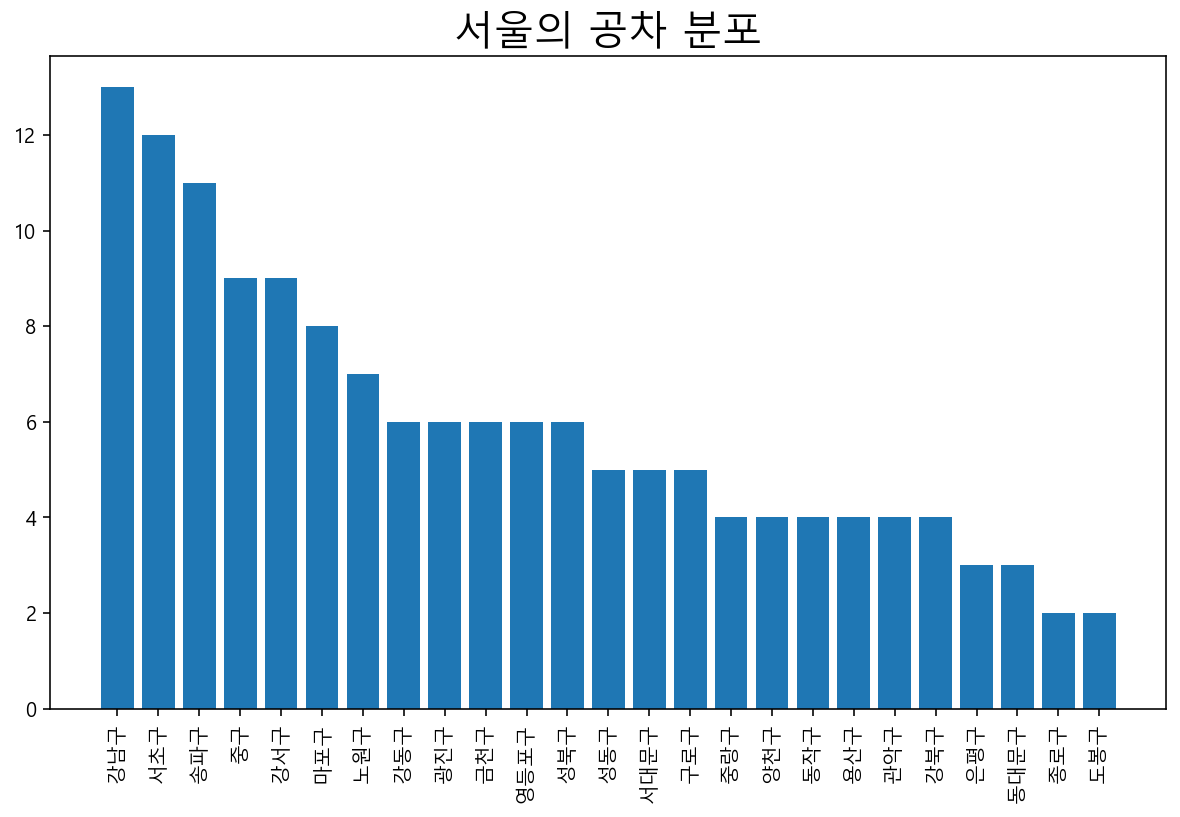

In [17]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(10, 6))
plt.title("서울의 공차 분포", fontdict={"fontsize" : 20})
plt.bar(df_seoul_kongcha['시군구명'].value_counts().index, df_seoul_kongcha['시군구명'].value_counts().values)
plt.xticks(rotation='vertical')
# plt.xticks(rotation='horizontal')
plt.savefig("kongcha_barplot.png")
plt.show()

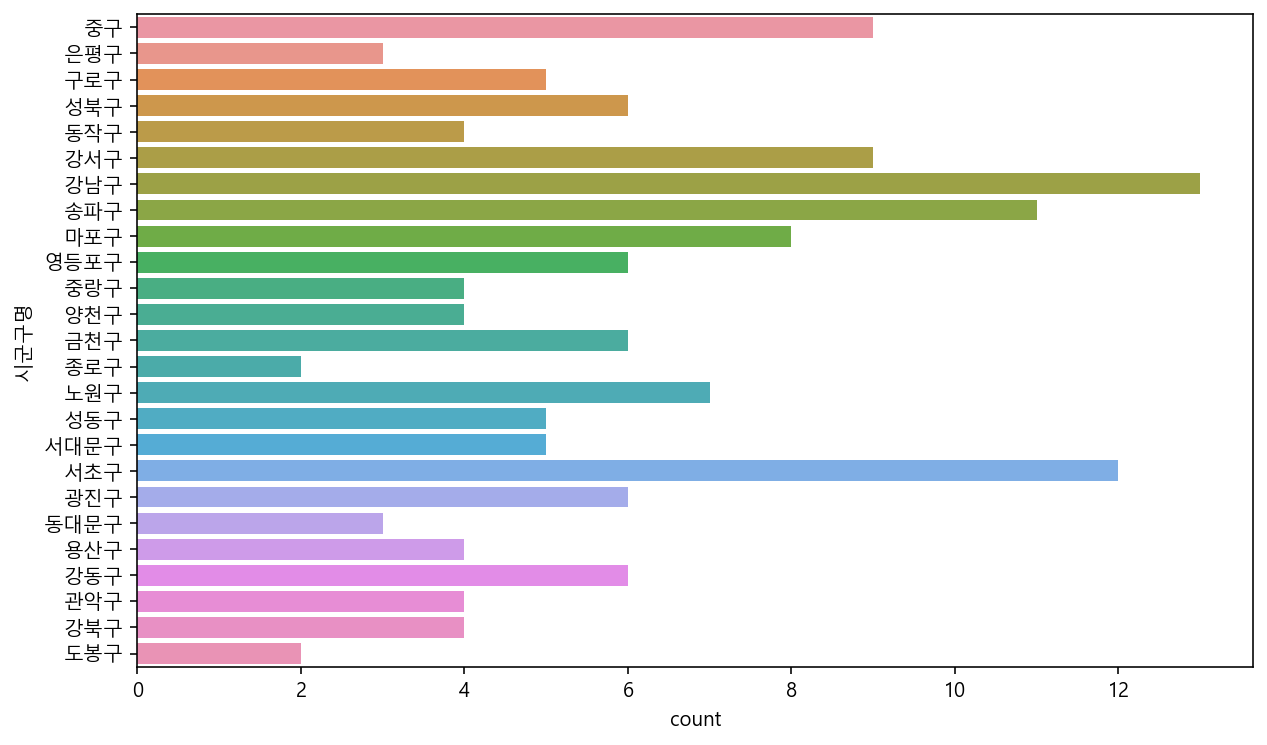

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data = df_seoul_kongcha, y='시군구명')
plt.savefig("kongcha_countplot.png")
plt.show()

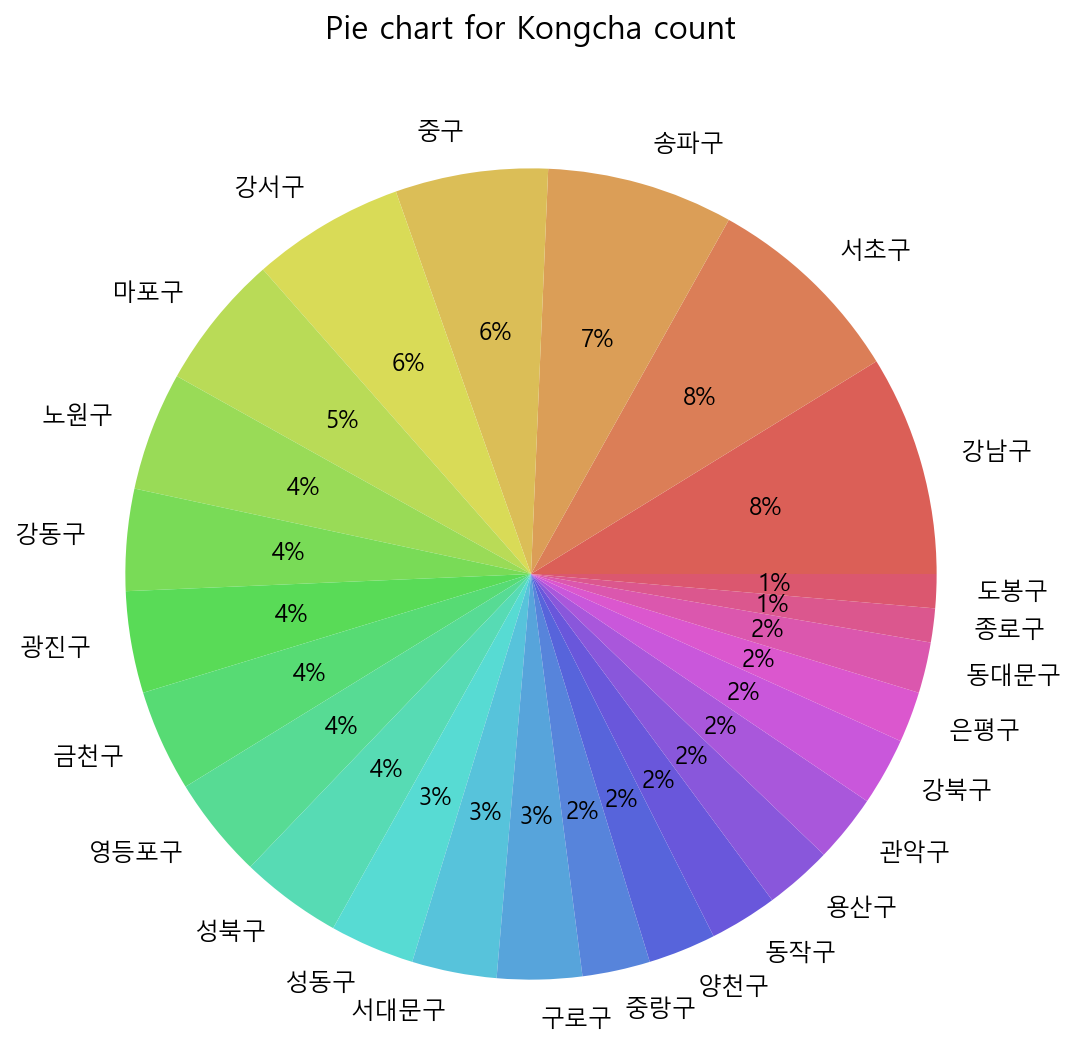

In [19]:
plt.figure(figsize=(8,8))
plt.pie(df_seoul_kongcha['시군구명'].value_counts().values,
        labels=df_seoul_kongcha['시군구명'].value_counts().index,
        autopct='%d%%',
        colors=sns.color_palette('hls',len(df_seoul_kongcha['시군구명'].value_counts().index)),
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Pie chart for Kongcha count", fontsize=16, pad=50)
plt.savefig("Kongcha_piechart.png")
plt.show()

## 지도로 시각화하기

In [20]:
df_seoul_kongcha.head(1)

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805451907,공차DDP,NaN,음식,비알코올,서울특별시,중구,광희동,127.010889,37.568003


In [21]:
# 공차가 어디에 있는지 경도와 위도를 활용해 나타냅니다.
df_seoul_kongcha[["상호명", "경도", "위도"]]

,상호명,경도,위도
0,공차DDP,127.010889,37.568003
1,공차녹번역점,126.932699,37.600840
2,공차구로NC,126.882759,37.500633
3,공차,127.030977,37.605049
4,공차노량진학원가점,126.943467,37.512816
...,...,...,...
143,공차홈플러스,126.849946,37.564256
144,공차고척,126.859288,37.498634
145,공차,127.034416,37.601014
146,공차,127.090512,37.551334


In [22]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import folium

# 중심 지정
lat = df_seoul_kongcha['위도'].mean()
long = df_seoul_kongcha['경도'].mean()

m = folium.Map([lat, long], zoom_start=11)

# 지도위에 표시
for i in df_seoul_kongcha.index:
    sub_lat = df_seoul_kongcha.loc[i, '위도']
    sub_long = df_seoul_kongcha.loc[i, '경도']
    
    title = df_seoul_kongcha.loc[i, '상호명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat, sub_long], tooltip = title).add_to(m)

m.save('kongcha_mark.html')
m

In [24]:
# 동그라미 마크 표시하기
m = folium.Map([lat, long], zoom_start=11, tiles='OpenStreetMap') #tiles = 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain'

for i in df_seoul_kongcha.index:
    sub_lat = df_seoul_kongcha.loc[i, '위도']
    sub_long = df_seoul_kongcha.loc[i, '경도']
    
    title = df_seoul_kongcha.loc[i, '상호명']
    
    folium.CircleMarker([sub_lat, sub_long], color='green', radius = 4, tooltip = title).add_to(m)

m.save('kongcha_cmark.html')
m

# 결론
### 프로젝트에 대하여

 - 공공데이터셋은 모든 상권 데이터가 들어있지만, 빠른 연습을 위해 서울에 있는 스타벅스 데이터만 뽑아서 진행하였다.
- 간단한 결과이고 특별한 관찰은 없었지만, 그래프 시각화와 지도 시각화를 진행해보았다.

### 관찰 결과

- 강남구, 중구, 서초구, 송파구, 종로구 등 순으로 스타벅스가 많이 들어서 있다.
- 특별한 관찰 결과는 없다. 연습이기 때문.

### Develop Project

- 다양한 분석을 시행할 수 있으며, 땅값, 회사 수 등과 스타벅스 입점 수와의 상관관계를 살펴볼 수도 있울 것이다.
- 스타벅스 뿐아니라 다른 브랜드에 대해서도 분석해볼 수 있다.
- 프랜차이즈 비율에 대해서도 살펴볼 수 있다.
- 커피전문점이 아닌 다른 항목에 대해서도 분석해볼 수 있다.